<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/MLP/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=3)

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [ ]:
def Machine(x1, x2, 
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1):
    y1 = sigmoid(x1 * w1_11 + x2 * w1_12 + b1_1)
    y2 = sigmoid(x1 * w1_21 + x2 * w1_22 + b1_2)

    y_hat = sigmoid(y1 * w2_11 + y2 * w2_12 + b2_1)

    return y_hat

In [ ]:
def Cost(x1, x2, y,
         w1_11, w1_12, b1_1,
         w1_21, w1_22, b1_2,
         w2_11, w2_12, b2_1):
    
    y_hat = Machine(x1, x2,
                    w1_11, w1_12, b1_1,
                    w1_21, w1_22, b1_2,
                    w2_11, w2_12, b2_1)
    
    loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

    return loss

In [ ]:
def Learning(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2,
             w2_11, w2_12, b2_1,
             step):
    
    current = Cost(x1, x2, y,
                   w1_11, w1_12, b1_1,
                   w1_12, w1_22, b1_2,
                   w2_11, w2_12, b2_1)
    
    dw1_11 = (Cost(x1, x2, y,
                   w1_11 + 0.0001, w1_12, b1_1,
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    dw1_12 = (Cost(x1, x2, y,
                   w1_11, w1_12 + 0.0001, b1_1,
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1) - current) / 0.0001

    db1_1 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1 + 0.0001,
                w1_21, w1_22, b1_2,
                w2_11, w2_12, b2_1) - current) / 0.0001
    
    dw1_21 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1,
                w1_21 + 0.0001, w1_22, b1_2,
                w2_11, w2_12, b2_1) - current) / 0.0001

    dw1_22 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1,
                w1_21, w1_22 + 0.0001, b1_2,
                w2_11, w2_12, b2_1) - current) / 0.0001

    db1_2 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1,
                w1_21, w1_22, b1_2 + 0.0001,
                w2_11, w2_12, b2_1) - current) / 0.0001

    dw2_11 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1,
                w1_21, w1_22, b1_2,
                w2_11 + 0.0001, w2_12, b2_1) - current) / 0.0001

    dw2_12 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1,
                w1_21, w1_22, b1_2,
                w2_11, w2_12 + 0.0001, b2_1) - current) / 0.0001

    db2_1 = (Cost(x1, x2, y,
                w1_11, w1_12, b1_1,
                w1_21, w1_22, b1_2,
                w2_11, w2_12, b2_1 + 0.0001) - current) / 0.0001

    w1_11 = w1_11 - step * dw1_11
    w1_21 = w1_12 - step * dw1_21
    b1_1 = b1_1 - step * db1_1

    w1_21 = w1_21 - step * dw1_21
    w1_21 = w1_22 - step * dw1_22
    b1_2 = b1_2 - step * db1_2

    w2_11 = w2_11 - step * dw2_11
    w2_21 = w2_12 - step * dw2_12
    b2_1 = b2_1 - step * db2_1
    
    return np.array([w1_11, w1_12, b1_1,
                     w1_21, w1_22, b1_2,
                     w2_11, w2_12, b2_1])

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv'
DF = pd.read_csv(url)
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [ ]:
x1 = np.array(DF[['balance']].head(2000))
x2 = np.array(DF[['income']].head(2000))

target = DF['default'].head(2000)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(target)
y = encoder.transform(target)

y.shape

(2000,)

In [ ]:
w1_11 = 0.001
w1_12 = 0.002
b1_1 = 0.003

w1_21 = 0.004
w1_22 = 0.005
b1_2 = 0.006

w2_11 = 0.007
w2_12 = 0.008
b2_1 = 0.009

In [ ]:
%%time

cost = np.ones(500)

for i in range(0,500):
    cost[i] = Cost(x1, x2, y,
                   w1_11, w1_12, b1_1,
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1)
    
    temp = Learning(x1, x2, y,
                    w1_11, w1_12, b1_1,
                    w1_21, w1_22, b1_2,
                    w2_11, w2_12, b2_1,
                    0.05)
    
    w1_11 = temp[0]
    w1_12 = temp[1]
    b1_1 = temp[2]

    w1_21 = temp[3]
    w1_22 = temp[4]
    b1_2 = temp[5]
    
    w2_11 = temp[6]
    w2_12 = temp[7]
    b2_1 = temp[8]

CPU times: user 1min 40s, sys: 575 ms, total: 1min 41s
Wall time: 1min 41s


In [ ]:
print(temp)

[ 0.001  0.002  0.003  0.005  0.005  0.006 -1.553  0.008 -1.551]


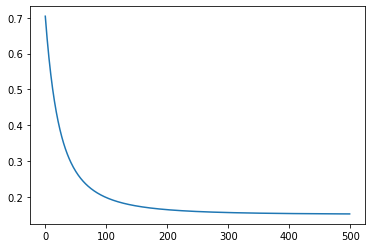

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.show()